### Introduction
In this notebook, we will demonstrate the power and flexibility of the Evolutionary Forest Regressor, a machine learning algorithm that combines the strengths of decision trees and genetic programming, while supporting Pandas DataFrame as input. This makes it easy to work with complex data structures and perform data preprocessing efficiently. We will walk you through a simple example, primarily demonstrating how to generate a dataset, train the model, evaluate its performance, and most importantly, showcase the process of synthesizing high-order features using Pandas DataFrames as input.

### Step 1: Importing necessary libraries

First, we import all the required libraries, including Pandas, NumPy, and the EvolutionaryForestRegressor from the evolutionary_forest package.

In [10]:
import sys
sys.path.insert(0, '../')

import random
import string
import pandas as pd
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from evolutionary_forest.forest import EvolutionaryForestRegressor

### Step 2: Generating a dataset

We generate a synthetic dataset using the make_friedman1 function from the scikit-learn library, which creates a dataset with 100 samples, five features, and a single target variable. We then convert the NumPy arrays to Pandas DataFrames for better interpretability.

In [11]:
random.seed(0)
np.random.seed(0)

# Generate dataset
X, y = make_friedman1(n_samples=100, n_features=5, random_state=0)

# Convert numpy arrays to pandas dataframe
X = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
y = pd.DataFrame(y, columns=['Target'])

### Step 3: Splitting the dataset

To evaluate the performance of our model, we split the dataset into training and testing sets using the train_test_split function from scikit-learn, with 80% of the data reserved for training and the remaining 20% for testing.

In [12]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 4: Training the Evolutionary Forest

We instantiate an EvolutionaryForestRegressor with various hyperparameters, such as the maximum tree height, normalization, selection method, and base learner, among others. Next, we fit the model to the training data using the fit method.

In [13]:
# Train Evolutionary Forest
r = EvolutionaryForestRegressor(max_height=5, normalize=True, select='AutomaticLexicase',
                                gene_num=10, boost_size=100, n_gen=20, n_pop=200, cross_pb=1,
                                base_learner='Random-DT', verbose=True, n_process=1)
r.fit(x_train, y_train)

data shape (80, 5) (80,)
   	      	                                                          fitness                                                           	                                  size                                  
   	      	----------------------------------------------------------------------------------------------------------------------------	------------------------------------------------------------------------
gen	nevals	25%         	75%         	avg         	gen	max         	median      	min         	nevals	std         	25%	75%	avg  	gen	max	median	min	nevals	std     
0  	200   	[0.19012237]	[0.43453516]	[0.27484596]	0  	[0.66708961]	[0.33572612]	[-0.7157414]	200   	[0.25761531]	4  	4  	3.995	0  	6  	4     	3  	200   	0.644186
defaultdict(<class 'int'>, {'1': 200})
P value of different population 0.024625161703711002
Add(Sub(B, 1), Mul(1, D))
Mul(A, A)
Sub(C, C)
AQ(D, A)
AQ(A, C)
Add(D, E)
AQ(C, B)
Add(A, B)
AQ(1, B)
Mul(E, E)
Unique Hash [106, 97, 98, 84,

EvolutionaryForestRegressor(basic_primitives='Add,Sub,Mul,AQ', boost_size=100,
                            cross_pb=1, gene_num=10, mab_parameter={},
                            map_elite_parameter={}, max_height=5, n_pop=200,
                            select='AutomaticLexicase', verbose=True)

### Step 5: Evaluating the model

To evaluate the performance of our trained model, we use the r2_score metric from scikit-learn, which measures the proportion of variance in the target variable that is predictable from the input features. The closer the R² score is to 1, the better the model is at predicting the target variable.

In [14]:
print(r2_score(y_test, r.predict(x_test)))

0.7373017164628979


### Step 6: Analyzing feature importance

Using the get_feature_importance and plot_feature_importance functions from the evolutionary_forest.utils module, we can visualize the importance of each feature in the dataset. This can provide valuable insights into which features contribute the most to the model's predictions.

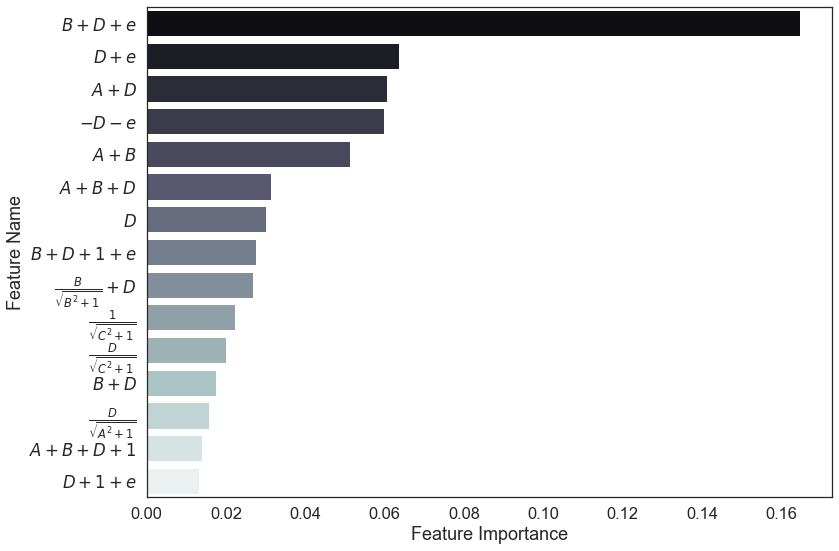

In [15]:
from evolutionary_forest.utils import get_feature_importance, plot_feature_importance

code_importance_dict = get_feature_importance(r)
plot_feature_importance(code_importance_dict)

### Step 7: Synthesizing new features

In this section, we highlight the ability of the Evolutionary Forest to synthesize new features while maintaining the output format as a Pandas DataFrame. This is particularly useful for keeping track of the newly created high-order features and their relationships with the original features.

When using the feature_append function, it generates new features based on the top features identified earlier and appends them to the original DataFrame. The output is a Pandas DataFrame with column names that represent the high-order features, clearly indicating their relationship with the initial features. This makes it easy to interpret and understand the newly generated features and their potential impact on the model's performance.

By maintaining the output as a Pandas DataFrame and providing meaningful column names, the Evolutionary Forest algorithm ensures a seamless integration with your existing data processing pipeline and allows you to further analyze and manipulate the synthesized features using the familiar and powerful Pandas library.

In [16]:
from evolutionary_forest.utils import feature_append

# Synthesize new features
code_importance_dict = get_feature_importance(r, simple_version=False)
top_features = list(code_importance_dict.keys())[:len(code_importance_dict) // 2]
new_train = feature_append(r, pd.DataFrame(r.x_scaler.transform(x_train),columns=x_train.columns), top_features, only_new_features=False)
new_test = feature_append(r, pd.DataFrame(r.x_scaler.transform(x_train),columns=x_train.columns), top_features, only_new_features=False)
new_train

,A,B,C,D,E,"Add(E, Add(D, B))","Add(D, E)","Add(D, A)","Sub(Sub(C, D), Add(E, C))","Add(B, A)",...,"Sub(Mul(B, B), A)","AQ(C, Add(AQ(D, C), AQ(A, B)))","Mul(AQ(A, D), Mul(1, B))","Mul(C, Mul(Sub(B, E), B))","AQ(A, Sub(E, D))","Add(Sub(E, C), AQ(C, B))","Sub(AQ(E, A), Sub(E, 0))","Sub(Mul(C, E), D)","AQ(Add(A, A), E)","Sub(A, E)"
0,1.065143,-0.579668,-0.255408,0.242361,1.032729,0.695422,1.275090,1.307504,-1.275090,0.485474,...,-0.729127,-0.167068,-0.600058,-0.238718,0.835649,1.067169,-0.325866,-0.506128,1.481894,0.032414
1,1.109978,-1.185054,-1.294610,-1.396617,0.515862,-2.065809,-0.880755,-0.286639,0.880755,-0.075076,...,0.294374,-1.282470,-0.765776,-2.609513,0.514321,0.975561,-0.170574,0.728777,1.972913,0.594116
2,-1.401258,-1.628338,1.280293,0.866252,1.159389,0.397303,2.025641,-0.535007,-2.025641,-3.029596,...,4.052742,1.255412,1.724626,5.811712,-1.344675,0.549096,-0.485909,0.618106,-1.830427,-2.560648
3,0.782269,-0.728053,-1.125917,-0.400596,1.440231,0.311581,1.039635,0.381673,-1.039635,0.054216,...,-0.252207,-1.057190,-0.528690,-1.777403,0.373414,1.655917,-0.305855,-1.220985,0.892310,-0.657962
4,1.779483,0.705713,-0.829664,1.422357,0.707030,2.835100,2.129388,3.201840,-2.129388,2.485196,...,-1.281453,-0.303049,0.722263,0.000771,1.447312,0.858831,-0.360653,-2.008955,2.905988,1.072453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-1.461001,-0.674892,-1.045589,-0.319058,-1.241996,-2.235946,-1.561054,-1.780060,1.561054,-2.135894,...,1.916481,-0.598772,0.939364,0.400182,-1.073623,-1.063085,0.540485,1.617675,-1.832507,-0.219006
76,1.135062,-0.791623,-0.288404,0.240003,-0.781912,-1.333532,-0.541909,1.375065,0.541909,0.343439,...,-0.508395,-0.192028,-0.873729,-0.002217,0.793864,-0.719635,0.265025,-0.014496,1.788338,1.916974
77,-0.728124,-1.239145,-1.377173,-0.699913,-0.816707,-2.755765,-1.516620,-1.428036,1.516620,-1.967268,...,2.263603,-1.039762,0.739183,-0.720897,-0.723208,-0.304419,0.156474,1.824659,-1.127888,0.088584
78,-0.160961,-0.390247,0.018500,-0.778688,0.238694,-0.930241,-0.539994,-0.939648,0.539994,-0.551207,...,0.313253,0.013557,0.049561,0.004541,-0.112832,0.237428,-0.003033,0.783104,-0.313125,-0.399654


### Conclusion
In this notebook, we demonstrated how the Evolutionary Forest Regressor can be used with Pandas DataFrames, making it a powerful tool for working with complex data structures. By showcasing its ability to generate insights, such as feature importance, and synthesize new features, we hope to inspire you to try out this versatile algorithm in your own data science projects.
